In [186]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [201]:
df = pd.read_csv('../data/nutritional_values.csv')
recetas = pd.read_csv('../data/output.csv',sep='|')
ing = pd.read_csv('../data/ingredients_100.csv')
ing_raw = pd.read_csv('../data/ingredientes.csv',sep='|')

In [175]:
df['Total_Grams'].describe()

count      7193.000000
mean       3886.029994
std       18748.642579
min           0.000000
25%         498.000000
50%         900.000000
75%        1549.310000
max      750501.000000
Name: Total_Grams, dtype: float64

In [210]:
df.sort_values(['energía, total'], ascending=False)[:10]

,Recipe_id,alcohol (etanol),"energía, total","grasa, total (lipidos totales)","proteina, total",agua (humedad),"fibra, dietetica total",carbohidratos,ácido graso 22:6 n-3 (ácido docosahexaenóico),"ácidos grasos, monoinsaturados totales",...,calcio,"hierro, total",potasio,magnesio,sodio,fósforo,ioduro,"selenio, total",zinc (cinc),Total_Grams
2685,36774,0.0,39803.848902,3840.344167,1337.154723,7895.201500,7.187362,60.675002,6.560000,2189.865286,...,0.962511,0.112559,30.513849,1.572492,63.565070,13.770885,0.000025,0.001127,0.145412,13154.80556
4549,55961,0.0,15161.960000,1594.631100,30.012000,54.927000,0.762000,215.715300,0.000000,1223.482900,...,0.341150,0.005115,0.384930,0.066000,1.575019,0.581840,0.000117,0.000026,0.002671,1904.00000
6466,64838,0.0,14655.434123,1622.888305,10.839180,401.746438,15.762373,49.329644,0.000000,1153.690924,...,0.748416,0.046975,1.388171,0.181216,3.855605,0.268910,0.000076,0.000004,0.001510,2110.27218
5810,60328,0.0,14055.409773,519.549848,585.338634,1601.624388,59.969362,1727.654502,1.656599,210.509391,...,0.668808,0.050027,15.383846,1.067202,16.061721,9.271147,0.000084,0.000339,0.047091,4543.26994
2411,32470,0.0,13988.721379,1432.393651,66.690607,1450.890888,39.063049,243.585857,0.000000,1093.917358,...,0.621437,0.021845,3.736932,0.241024,3.470175,1.075246,0.000129,0.000188,0.007589,3251.71975
5653,59743,0.0,13700.773380,1468.607451,158.221607,850.802088,5.921049,4.611857,0.000000,1012.565698,...,0.474076,0.017454,2.612992,0.369801,6.729722,1.734600,0.000382,0.000247,0.026663,2500.93825
5819,60369,0.0,13651.157819,1462.485819,64.100515,1759.494905,38.570596,100.017441,0.000000,1007.865298,...,2.291627,0.006456,4.751588,0.298618,2.899848,1.618848,0.000085,0.000015,0.007575,3456.86250
6685,67993,0.0,12301.600064,1362.644291,35.634287,329.105779,2.608573,13.838781,0.000000,951.522384,...,0.179680,0.005876,0.755300,0.052336,0.922572,0.587671,0.000057,0.000035,0.003739,1744.28579
1616,26161,0.0,12132.817159,1218.057052,210.799267,713.195343,11.439979,111.201818,0.000000,814.923180,...,2.427367,0.020545,3.147074,0.324029,7.213070,1.819549,0.000305,0.000370,0.017696,2292.82793
270,8427,0.0,11580.599560,1008.493873,53.160226,224.334318,11.350688,590.581878,0.000000,783.958592,...,0.165062,0.005189,1.778687,0.152632,0.631892,1.109918,0.000029,0.000049,0.002117,1894.64065


In [213]:
df[df['energía, total']> 1800]

,Recipe_id,alcohol (etanol),"energía, total","grasa, total (lipidos totales)","proteina, total",agua (humedad),"fibra, dietetica total",carbohidratos,ácido graso 22:6 n-3 (ácido docosahexaenóico),"ácidos grasos, monoinsaturados totales",...,calcio,"hierro, total",potasio,magnesio,sodio,fósforo,ioduro,"selenio, total",zinc (cinc),Total_Grams
20,98,0.000000,4280.100000,287.550000,64.850000,567.350000,17.500000,357.500000,0.000000,88.871500,...,0.314200,0.010960,0.994900,0.150900,4.957275,0.754800,0.000095,0.000040,0.004170,1310.00000
23,109,0.000000,2494.521721,154.411838,41.303870,301.480799,7.310500,236.053000,0.000000,49.846001,...,1.882182,0.222009,2.652833,0.129677,2.091421,1.140393,0.000044,0.000013,0.004362,757.08335
27,6326,0.000000,3790.189830,211.074556,113.794009,554.888634,19.083224,356.564702,0.418462,88.387841,...,0.702104,0.086988,4.076104,0.241915,4.266178,1.458728,0.000028,0.000122,0.011325,1251.19862
37,6480,4.290000,2614.460647,191.564563,175.373221,1170.780183,18.756408,42.514354,0.033197,98.868096,...,0.414963,0.015494,4.557435,0.296155,4.985692,1.777827,0.000139,0.000108,0.010004,1611.11248
38,6489,15.574776,2109.248964,177.542586,89.128196,719.225203,5.946412,14.387227,0.418462,95.015277,...,0.171510,0.012155,2.793751,0.182434,7.713726,0.987675,0.000060,0.000073,0.010112,1031.32895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7174,74142,21.450000,2941.123997,220.468633,147.251914,1507.020287,15.008465,56.392282,0.090000,81.078266,...,2.118060,0.022966,3.794214,0.305665,5.311671,1.926381,0.000144,0.000152,0.023885,1975.51543
7175,74146,0.000000,7069.600000,640.376000,144.868000,1089.892000,12.808000,194.390900,0.016000,169.277600,...,0.938160,0.012728,2.715440,0.235420,3.157632,1.736640,0.000165,0.000145,0.010191,2084.00000
7177,74154,0.000000,2761.935834,157.494375,194.583745,582.123994,16.169998,139.315964,0.000000,66.700000,...,1.587166,0.019666,2.271840,0.218452,6.611991,2.460350,0.000089,0.000154,0.015509,1114.19995
7178,74157,0.000000,3441.640000,266.579000,182.518000,2102.273300,20.998000,80.731200,0.820000,120.426000,...,0.411010,0.024888,7.227630,0.344180,8.262010,2.074040,0.000056,0.000157,0.021129,2663.00000


In [203]:
ing.sort_values(['Total_Grams'], ascending=False)[:30]

,Recipe_id,Ingrediente,Cantidad,Unidad,Indice,Grams,Total_Grams,Num_comensales
15716,36774,cerdo,5.0,kilogramos,175,1000.0,5000.0,1.0
25674,26668,agua,5.0,litros,766,1000.0,5000.0,1.0
43187,32810,agua,4.0,litros,766,1000.0,4000.0,1.0
39974,24593,leche,4.0,litros,27,1000.0,4000.0,1.0
19873,22024,agua,4.0,litros,766,1000.0,4000.0,1.0
15980,60464,agua,4.0,litros,766,1000.0,4000.0,1.0
48637,55589,patata,20.0,unidad,643,200.0,4000.0,1.0
25862,25460,agua,4.0,litros,766,1000.0,4000.0,1.0
10742,26912,pollo,10.0,muslos,242,390.0,3900.0,1.0
6266,59351,agua,15.0,vasos,766,250.0,3750.0,1.0


In [137]:
print(recetas[recetas['Id']==23115]['Ingredientes'])

8102    400 gr de pechuga de pollo,1 pimiento verde o ...
Name: Ingredientes, dtype: object


In [214]:
ing[ing['Recipe_id']==98]

,Recipe_id,Ingrediente,Cantidad,Unidad,Indice,Grams,Total_Grams,Num_comensales
28915,98,harina,1.0,kilogramo,482,1000.0,500.0,2.0
28916,98,manteca,80.0,gramos,417,1.0,40.0,2.0
28917,98,sal,15.0,gramos,908,1.0,7.5,2.0
28918,98,agua,625.0,mililitros,766,1.0,312.5,2.0
28919,98,mantequilla,900.0,gramos,419,1.0,450.0,2.0


In [115]:
macros = df[['energía, total',
       'grasa, total (lipidos totales)', 'proteina, total',
       'fibra, dietetica total', 'carbohidratos']].copy()
macros.head()

,"energía, total","grasa, total (lipidos totales)","proteina, total","fibra, dietetica total",carbohidratos
0,0.00,0.0000,0.0000,0.000,0.0000
1,177.45,4.6032,10.2882,2.692,22.8661
2,44.95,0.3741,2.3100,4.227,7.9070
3,387.10,1.6820,10.5550,8.750,81.0050
4,1642.66,152.6620,12.2830,5.408,58.0880


In [125]:
clusters = 4

pipe = Pipeline([('scaler', StandardScaler()),('cluster',cluster.KMeans(n_clusters=clusters))])
macros['cluster'] = pipe.fit_predict(macros)

In [126]:
def print_cluster_stats(df, clusters):
    print('Items per cluster: ')
    items_cluster = [len(df[df['cluster']==cluster]) for cluster in range(clusters)]
    print(items_cluster)

In [127]:
print_cluster_stats(macros, clusters)

Items per cluster: 
[7094, 64, 2, 33]


In [129]:
macros[macros['cluster']==2]

,"energía, total","grasa, total (lipidos totales)","proteina, total","fibra, dietetica total",carbohidratos,cluster
114,307180.60,995.10180,6032.04925,983.441,67141.830,2
1364,783518.21,16601.32075,42934.74250,3580.354,113043.849,2


In [139]:
df.iloc[114]['Recipe_id']

7167.0

In [87]:
macros.groupby('cluster')['energía, total'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4264.0,2569.379350,6186.334324,0.00,535.855,1135.280,2291.8850,117404.80
1,63.0,229469.272857,91787.695339,132838.83,166431.505,203555.340,315945.5250,525182.32
2,2836.0,3482.280765,7465.766173,0.00,686.910,1430.615,2778.9725,109472.56
3,30.0,86839.511667,142418.132389,8633.69,28908.490,57971.500,73635.6500,783518.21


In [88]:
macros.groupby('cluster')['grasa, total (lipidos totales)'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4264.0,135.427819,323.585479,0.000000,10.33620,50.488500,116.850250,5605.72400
1,63.0,11666.969944,5368.261560,2.521000,7685.42015,9708.479000,15404.170550,25005.01670
2,2836.0,183.406498,404.165334,0.000000,22.66785,78.878259,158.117475,9228.36790
3,30.0,911.768699,2968.182926,31.852794,261.50310,366.771318,470.508425,16601.32075


In [89]:
macros.groupby('cluster')['proteina, total'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4264.0,198.711079,932.881211,0.000000,14.440556,43.443750,96.952450,23977.041900
1,63.0,28681.153961,16384.831472,28.202375,15981.415937,24481.162525,39802.719000,83958.297250
2,2836.0,299.080127,1052.147133,0.000000,18.644781,51.658000,130.605375,20373.718125
3,30.0,3558.921705,7554.519288,373.503400,1300.672100,1893.415191,3324.441250,42934.742500


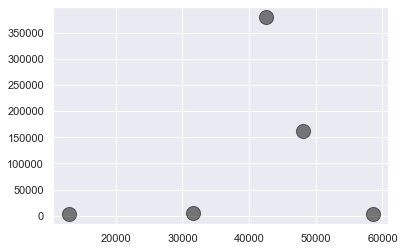

In [35]:
#plt.scatter(macros[:, 0], macros[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);